In [166]:
from math import sqrt
from time import time
import matplotlib.pyplot as plt
import numpy as np

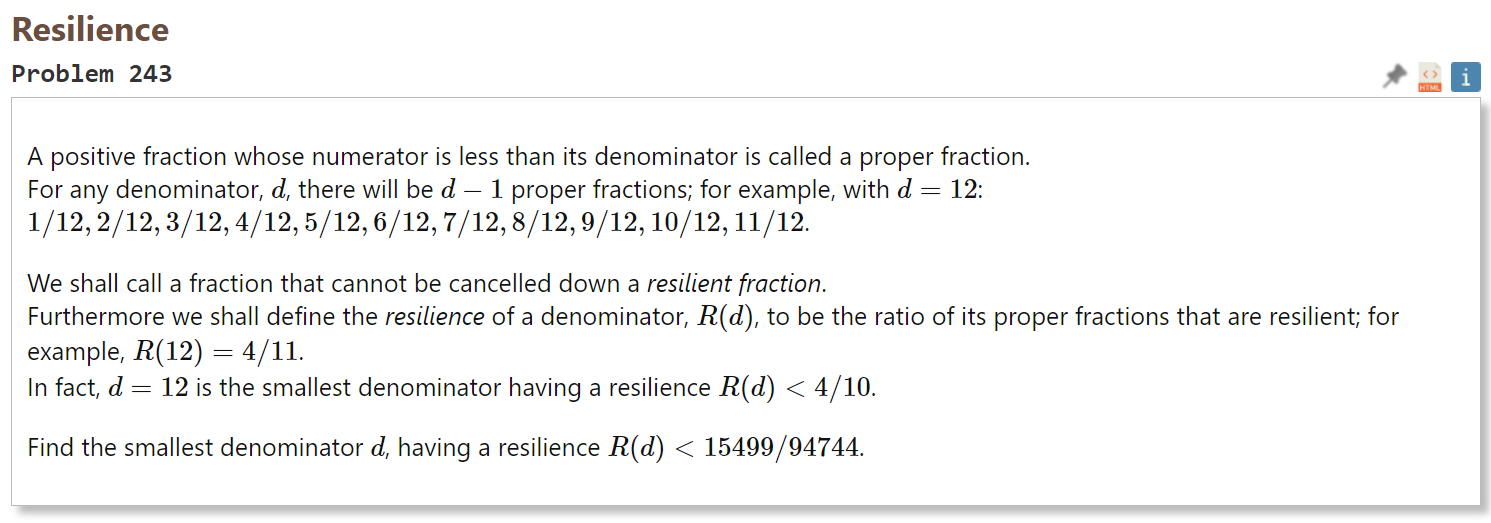

<ins>**Definition 1.0 - Simplification:**</ins>  
A fraction $\frac{n}{m}$ can be simplified if $\exists a \in \mathbb N$ such that $\frac{n}{m} = \frac{ax}{ay}$ with $n=ax$, $m=ay$ where $n, m, x, y \in \mathbb N$ (as we are only considering positive fractions).  
Fractions of this form we will define to have $s(n/m) = True$ if they can be simplified.  

<ins>**Definition 1.1 - Resilient:**</ins>  
A fraction $\frac{n}{m}$ is called resilient if it cannot be simplified => $\nexists a \in \mathbb N$ such that $\frac{n}{m} = \frac{ax}{ay}$.  
Fractions of this form we will define to have $r(n/m) = True$ if they are resilient.  

<ins>**Definition 2 - Resilience:**</ins>  
A number $d \in \mathbb N$ has resilience $R(d)$ defined to be the ratio of its proper fractions that are resilient.  
A number $d$ will have $d-1$ proper fractions - so $R(d) = \frac{|\{n/d \text{ for } n \in [1, d-1]]: r(n/m)\}|}{d-1}$ $n \in \mathbb N$.  
The numerator $|\{n/d \text{ for } n \in [1, d-1]]: r(n/m)\}|$ is the number ($|A|$ = number of elements in set $A$) of elements in the set of elements that are proper fractions of $d$ and are resilient.

### Brute Force Method

A brute force method would:  
  
**Loop**
- increment $d$ one by one, each time checking $R(d)$
- if $R(d)$ is less than the upper bound $u = 15499/94744$ then finish and return $d$
  
**Resilience**  
- we would check the resilience of a $d$ by looping through each proper fraction of $d$
- checking if it shares any factors with $d$ so they can be cancelled out (the factor would be $a$ here)
- add $1$ to a $counter$ whenever a fraction is resilient (not simplifiable)
- return $counter/(d-1)$

In [1]:
def resilient(numerator, denominator):
    if numerator == 1:
        return True
    if denominator%numerator == 0:
        return False
    # Check what are the factors of numerator, see if denominator shares any
    for possible_divisor in range(2, int(sqrt(numerator))+1):
        if numerator%possible_divisor == 0:
            if denominator%possible_divisor == 0:
                return False
            if denominator%(numerator//possible_divisor) == 0:
                return False
    # If they share no factors the fraction is resilient (there exists no a)
    return True

assert resilient(1, 2) == True
assert resilient(3, 15) == False
assert resilient(2, 3) == True
assert resilient(15, 165) == False
assert resilient(15, 55) == False

In [73]:
def brute_force_resilience_numerator(d):
    counter = 0
    # Check numerators 1 to d-1
    for numerator in range(1, d):
        if resilient(numerator, d):
            counter += 1
    # The resilience will actually be counter/(d-1) but we want things expressed in fractions
    # so we just return the counter as we know what d-1 is anyway, we can use that later
    return counter

assert brute_force_resilience_numerator(2) == 1
assert brute_force_resilience_numerator(3) == 2
assert brute_force_resilience_numerator(4) == 2
assert brute_force_resilience_numerator(5) == 4
assert brute_force_resilience_numerator(6) == 2
assert brute_force_resilience_numerator(12) == 4
assert brute_force_resilience_numerator(78) == 24

In [28]:
def brute_force_lower_resilience_than_u(u, track_progress=False):
    # The highest a resilience can be is 1
    lowest_resilience = 2
    # Start at 2 since 1 isnt well defined
    d = 2
    while True:
        next_res_num = brute_force_resilience_numerator(d)
        next_res = next_res_num/(d-1)
        # Check if resilience lower than our upper bound u
        if next_res < u:
            return d

        # Check if its the next lowest resilience so far
        # This part isnt necessary but helps us track how our function is doing
        # it also lets us potentially see patterns
        if track_progress:
            if next_res < lowest_resilience:
                best_d = d
                lowest_resilience = next_res
                print(f'{d} - {next_res_num}/{d-1}')
        # Increment d
        d += 1

assert brute_force_lower_resilience_than_u(0.4) == 12
assert brute_force_lower_resilience_than_u(0.3) == 30
assert brute_force_lower_resilience_than_u(0.25) == 210
assert brute_force_lower_resilience_than_u(0.22) == 2310

Lets time how long it takes to get a benchmark for improvements

In [21]:
%%timeit
brute_force_lower_resilience_than_u(0.22)

3.52 s ± 247 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Below we can also start looking at the pattern it creates whenever there is a next lowest one

In [284]:
brute_force_lower_resilience_than_u(0.22, True)

2 - 1/1
4 - 2/3
6 - 2/5
12 - 4/11
18 - 6/17
24 - 8/23
30 - 8/29
60 - 16/59
90 - 24/89
120 - 32/119
150 - 40/149
180 - 48/179
210 - 48/209
420 - 96/419
630 - 144/629
840 - 192/839
1050 - 240/1049
1260 - 288/1259
1470 - 336/1469
1680 - 384/1679
1890 - 432/1889
2100 - 480/2099


2310

### Two Ways to Improve

### Only checking After Primes - PITFALL

Interestingly, they all look like they appear after 1 after increasing prime numbers (not necessarily consecutive though as we miss 19 for instance)  
PROBABLY INCORRECT

### Faster Resilience calculation

We actually only have to consider the prime factors of the denominator $d$ when calculating it's resilience.  
Because we know any multiple of the prime factors that are less than $d$ will appear in its proper fractions,  
e.g. prime factors of $12$ are $2$ and $3$ => {$2, 4, 6, 8, 10$}, {$3, 6, 9$} will all be in the proper fraction numerators of $12$.  
We can make this easier by just adding every $n^{th}$ multiple of a prime factor to a set, where $n \in [1, \frac{d}{n} - 1]$,  
e.g. we add $2*1, 2*2, 2*3, \dots 2*((12/2)-1) = 2, 4, 6, \dots, 10$.  
If we do this for each prime factor and add them to a set, the set will make sure there wont be any duplicates (we would count $6$ twice for $2$ and $3$),  
and then count how many elements are in this set.  
We count up to $\frac{d}{n} - 1$ because we dont want to include $d$ itself as it wont be in the proper fractions numerators.  
These are all the proper fraction numerators of $d$ that would be simplifiable, therefore we would remove these.  
  
So if we are now given a $d$, we only need to find the prime factors (or all factors as they would be removing the same exact ones e.g. 2 and 4 remove the same numerators) of $d$,  
and we can just do as the above and add multiples of them (by how much they multiply into $d$ - 1) into a set,  
$(d - 1) - |set| = numerator$ because there are $d-1$ proper fractions, and we are removing all the multiples of the factors ($|set|$).  
We divide this by the number of proper fractions to get the ratio so,  
$R(d) = \frac{(d - 1) - |set|}{d-1}$.

In [133]:
# With a for loop
def resilience_numerators_by_factors_looped(d):
    factors = set()
    for possible_factor in range(2, int(sqrt(d))+1):
        if d%possible_factor == 0:
            other_factor = d//possible_factor
            for multiplier in range(1, other_factor):
                factors.add(possible_factor*multiplier)
            for multiplier in range(1, possible_factor):
                factors.add(other_factor*multiplier)
    return d-1 - len(factors)

assert resilience_numerators_by_factors_looped(2) == 1
assert resilience_numerators_by_factors_looped(3) == 2
assert resilience_numerators_by_factors_looped(4) == 2
assert resilience_numerators_by_factors_looped(5) == 4
assert resilience_numerators_by_factors_looped(6) == 2
assert resilience_numerators_by_factors_looped(12) == 4
assert resilience_numerators_by_factors_looped(74) == 36

In [88]:
# With a set comprehension
def resilience_numerators_by_comprehension(d):
    # Need to add the other factors to the list comprehension as well
    smaller_factors = {factor*multiplier for factor in range(2, int(sqrt(d))+1) for multiplier in range(1, d//factor) if d%factor==0}
    bigger_factors = {(d//factor)*multiplier for factor in range(2, int(sqrt(d))+1) for multiplier in range(1, factor) if d%factor==0}
    return d-1 - len(smaller_factors.union(bigger_factors))

assert resilience_numerators_by_comprehension(2) == 1
assert resilience_numerators_by_comprehension(3) == 2
assert resilience_numerators_by_comprehension(4) == 2
assert resilience_numerators_by_comprehension(5) == 4
assert resilience_numerators_by_comprehension(6) == 2
assert resilience_numerators_by_comprehension(12) == 4
assert resilience_numerators_by_comprehension(74) == 36

In [100]:
# With a set comprehension
def resilience_numerators_by_single_comprehension(d):
    # Need to add the other factors to the list comprehension as well
    return d-1 - len({current_factor*multiplier for factor in range(2, int(sqrt(d))+1) for current_factor in [factor, d//factor] for multiplier in range(1, d//current_factor) if d%factor==0})

assert resilience_numerators_by_single_comprehension(2) == 1
assert resilience_numerators_by_single_comprehension(3) == 2
assert resilience_numerators_by_single_comprehension(4) == 2
assert resilience_numerators_by_single_comprehension(5) == 4
assert resilience_numerators_by_single_comprehension(6) == 2
assert resilience_numerators_by_single_comprehension(12) == 4
assert resilience_numerators_by_single_comprehension(74) == 36

In [79]:
brute_force_resilience_numerator(135156)

38592

In [80]:
resilience_numerators_by_factors_looped(135156)

38592

In [89]:
resilience_numerators_by_comprehension(135156)

38592

In [98]:
resilience_numerators_by_single_comprehension(135156)

38592

In [81]:
%%timeit
brute_force_resilience_numerator(135156)

473 ms ± 28.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [82]:
%%timeit
resilience_numerators_by_factors_looped(135156)

23.5 ms ± 2.35 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [90]:
%%timeit
resilience_numerators_by_comprehension(135156)

50.9 ms ± 3.1 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [99]:
%%timeit
resilience_numerators_by_single_comprehension(135156)

50.8 ms ± 3.58 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [488]:
def plot_different_function_times(functions, function_names, parameters, scale='linear'):
    time_lists = [[] for func in range(len(functions))]
    for param in parameters:
        for function, time_list in zip(functions, time_lists):   
            times = []
            for repeat in range(5):
                start = time()
                function(param)
                taken = time() - start
                times.append(taken)
            time_list.append(sum(times)/len(times))

    for i, name in enumerate(function_names):
        plt.plot(parameters, time_lists[i], label=name)
    plt.legend()
    plt.xlabel('param')
    plt.ylabel('Average Time (s)')
    if scale == 'log':
        plt.yscale('log')
    plt.show()

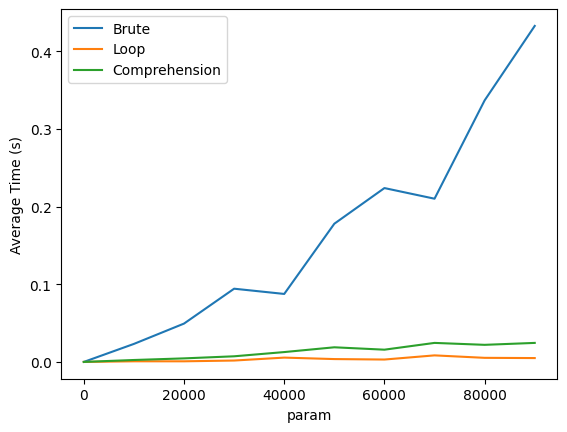

In [147]:
ds = [x for x in range(2, n, n//10)]
resil_func_names = ['Brute', 'Loop', 'Comprehension']
resil_functions = [
        brute_force_resilience_numerator,
        resilience_numerators_by_factors_looped,
        resilience_numerators_by_single_comprehension
]
plot_different_function_times(resil_functions, resil_func_names, ds)

### Use New Resilience

In [148]:
def loop_lower_resilience_than_u(u, track_progress=False):
    # The highest a resilience can be is 1
    lowest_resilience = 2
    # Start at 2 since 1 isnt well defined
    d = 2
    while True:
        next_res_num = resilience_numerators_by_factors_looped(d)
        next_res = next_res_num/(d-1)
        # Check if resilience lower than our upper bound u
        if next_res < u:
            return d

        # Check if its the next lowest resilience so far
        # This part isnt necessary but helps us track how our function is doing
        # it also lets us potentially see patterns
        if track_progress:
            if next_res < lowest_resilience:
                best_d = d
                lowest_resilience = next_res
                print(f'{d} - {next_res_num}/{d-1}')
        # Increment d
        d += 1

assert loop_lower_resilience_than_u(0.4) == 12
assert loop_lower_resilience_than_u(0.3) == 30
assert loop_lower_resilience_than_u(0.25) == 210
assert loop_lower_resilience_than_u(0.22) == 2310

In [153]:
brute_force_lower_resilience_than_u(0.22)

2310

In [154]:
loop_lower_resilience_than_u(0.22)

2310

In [151]:
%%timeit
brute_force_lower_resilience_than_u(0.22)

3.47 s ± 108 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [152]:
%%timeit
loop_lower_resilience_than_u(0.22)

163 ms ± 29 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


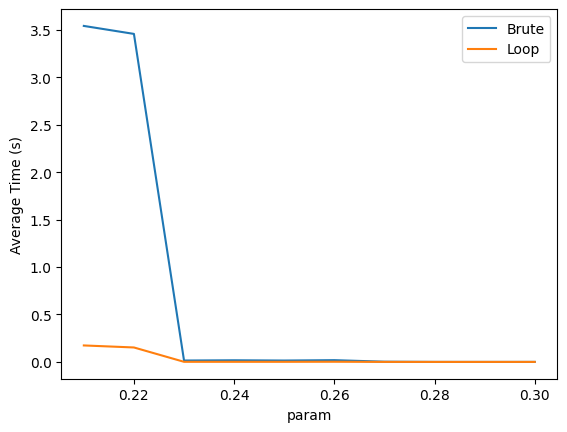

In [165]:
upper_bounds = [u/100 for u in range(30, 20, -1)]
lower_than_u_func_names = ['Brute', 'Loop']
lower_than_u_functions = [
        brute_force_lower_resilience_than_u,
        loop_lower_resilience_than_u
]
plot_different_function_times(lower_than_u_functions, lower_than_u_func_names, upper_bounds)

### Vague Rules of Least Resilient

### Sequential Multiples of Unique Primes must be Least Resilient - Giving Upper and Lower bounds

### Defiance

### Defiance <-> Resilience

Must have d as its denominator  
If we can find an easy way to calculate D(d), we can easily calculate R(d)

### Next Least Defiant Pattern

### All Least Resilient Numbers inbetween must have same Defiance

### Calculate Next Least Resilient by multiplying by Lowest next Unique Prime Factor

In [287]:
def generate_next_prime(highest_prime):
    possible_prime = highest_prime + 1
    while True:
        is_prime = True
        for possible_factor in range(2, possible_prime):
            if possible_prime%possible_factor == 0:
                is_prime = False
                break
        if is_prime:
            return possible_prime
        possible_prime += 1

assert generate_next_prime(2) == 3
assert generate_next_prime(3) == 5
assert generate_next_prime(5) == 7
assert generate_next_prime(7) == 11
assert generate_next_prime(23) == 29

In [290]:
def product_list(nums):
    product = 1
    for n in nums:
        product *= n
    return product

assert product_list([4, 2, 7, 5]) == 280

In [446]:
def find_lower_resilience(den, num, next_prime, upper_bound):
    for mult in range(1, next_prime):
        #print(f'{den=} {mult=} {mult*num=} {mult*den=} {(mult*num) / (mult*den - 1)=}')
        if (mult*num) / (mult*den - 1) < upper_bound:
            return den*mult

assert find_lower_resilience(30, 8, 7, 0.269) == 120

In [454]:
def answer(upper_bound):
    primes = [2]
    while True:
        den = product_list(primes)
        num = product_list([x-1 for x in primes])
        resilience = num/(den-1)
        if resilience == upper_bound:
            return 2*den
        elif resilience < upper_bound:
            next_prime = primes[-1]
            den = den//next_prime
            num = num//(next_prime-1)
            # Incase upper_bound falls between highest factor in last batch and first in next batch
            if (num*(next_prime-1))/(den*(next_prime-1) - 1) > upper_bound:
                return den*next_prime
            return find_lower_resilience(den, num, next_prime, upper_bound)
        primes.append(generate_next_prime(primes[-1]))

assert answer(0.25) == 210
assert answer(15499/94744) == 892371480

In [455]:
%%timeit
answer(final_u)

25.1 µs ± 1 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [456]:
%%timeit
answer(0.22)

8.03 µs ± 164 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [451]:
answer(final_u)

892371480

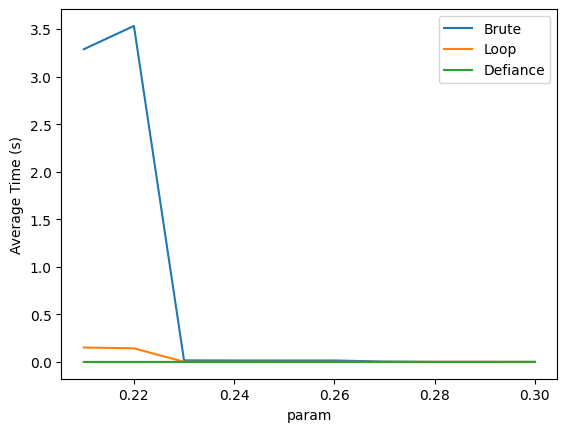

In [458]:
upper_bounds = [u/100 for u in range(30, 20, -1)]
lower_than_u_func_names = ['Brute', 'Loop', 'Defiance']
lower_than_u_functions = [
        brute_force_lower_resilience_than_u,
        loop_lower_resilience_than_u,
        answer
]
plot_different_function_times(lower_than_u_functions, lower_than_u_func_names, upper_bounds)

In [459]:
np.log(2)

0.6931471805599453

In [479]:
[1/np.log(x) for x in range(10, 140, 20)]

[0.43429448190325176,
 0.29401410379520604,
 0.25562221863533147,
 0.23537745555238682,
 0.2222316216158104,
 0.21274421382066935,
 0.20544281918875867]

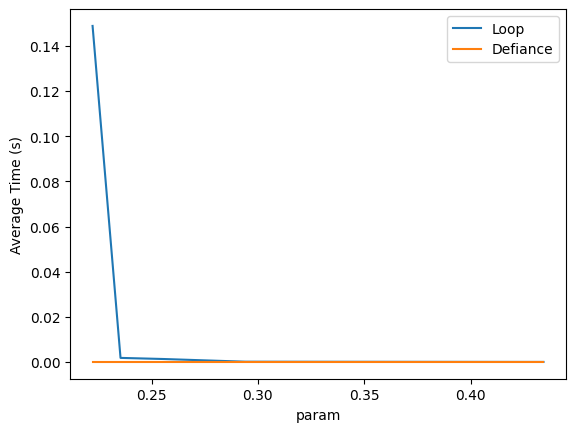

In [490]:
upper_bounds = [1/np.log(x) for x in range(10, 100, 20)]
lower_than_u_func_names = ['Loop', 'Defiance']
lower_than_u_functions = [
        loop_lower_resilience_than_u,
        answer
]
plot_different_function_times(lower_than_u_functions, lower_than_u_func_names, upper_bounds)